# Importing Necessary Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub
import pickle

from sklearn.preprocessing import MinMaxScaler

## Loading the Dataset from KaggleHub

In [70]:
import os
import pandas as pd

path = kagglehub.dataset_download("imaginativecoder/sleep-health-data-sampled")

files = os.listdir(path)
print("Files in the dataset directory:", files)

csv_file = os.path.join(path, 'Sleep_Data_Sampled.csv')

Sleep = pd.read_csv(csv_file)

print(Sleep.head())



Files in the dataset directory: ['Sleep_Data_Sampled.csv']
   Person ID Gender  Age         Occupation  Sleep Duration  Quality of Sleep  \
0          1   Male   35             Doctor            6.65                 7   
1          2   Male   42            Teacher            6.90                 8   
2          3   Male   34  Software Engineer            6.95                 7   
3          4   Male   32             Doctor            6.90                 6   
4          5   Male   37             Lawyer            6.85                 7   

   Physical Activity Level  Stress Level   BMI Category Blood Pressure  \
0                       50             7  Normal Weight         120/80   
1                       52             4         Normal         135/90   
2                       66             6     Overweight         126/83   
3                       52             7         Normal         120/80   
4                       60             6         Normal         125/80   

   Heart 

# Exploring the Data

In [71]:
Sleep.shape

(15000, 13)

In [72]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                15000 non-null  int64  
 1   Gender                   15000 non-null  object 
 2   Age                      15000 non-null  int64  
 3   Occupation               15000 non-null  object 
 4   Sleep Duration           15000 non-null  float64
 5   Quality of Sleep         15000 non-null  int64  
 6   Physical Activity Level  15000 non-null  int64  
 7   Stress Level             15000 non-null  int64  
 8   BMI Category             15000 non-null  object 
 9   Blood Pressure           15000 non-null  object 
 10  Heart Rate               15000 non-null  int64  
 11  Daily Steps              15000 non-null  int64  
 12  Sleep Disorder           15000 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 1.5+ MB


In [73]:
#Reviewing Numeric Variables
Sleep.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7500.500000,44.130667,6.997327,7.131267,59.925000,5.654800,70.857533,6795.080000
std,4330.271354,6.840091,0.615187,1.053111,16.814374,1.393568,3.614836,1329.706484
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,3750.750000,40.000000,6.500000,6.000000,45.000000,4.000000,68.000000,6000.000000
50%,7500.500000,44.000000,7.000000,7.000000,60.000000,6.000000,70.000000,6500.000000
75%,11250.250000,48.000000,7.450000,8.000000,75.000000,6.000000,72.000000,7600.000000
max,15000.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


array([[<Axes: title={'center': 'Person ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Sleep Duration'}>],
       [<Axes: title={'center': 'Quality of Sleep'}>,
        <Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Daily Steps'}>, <Axes: >]], dtype=object)

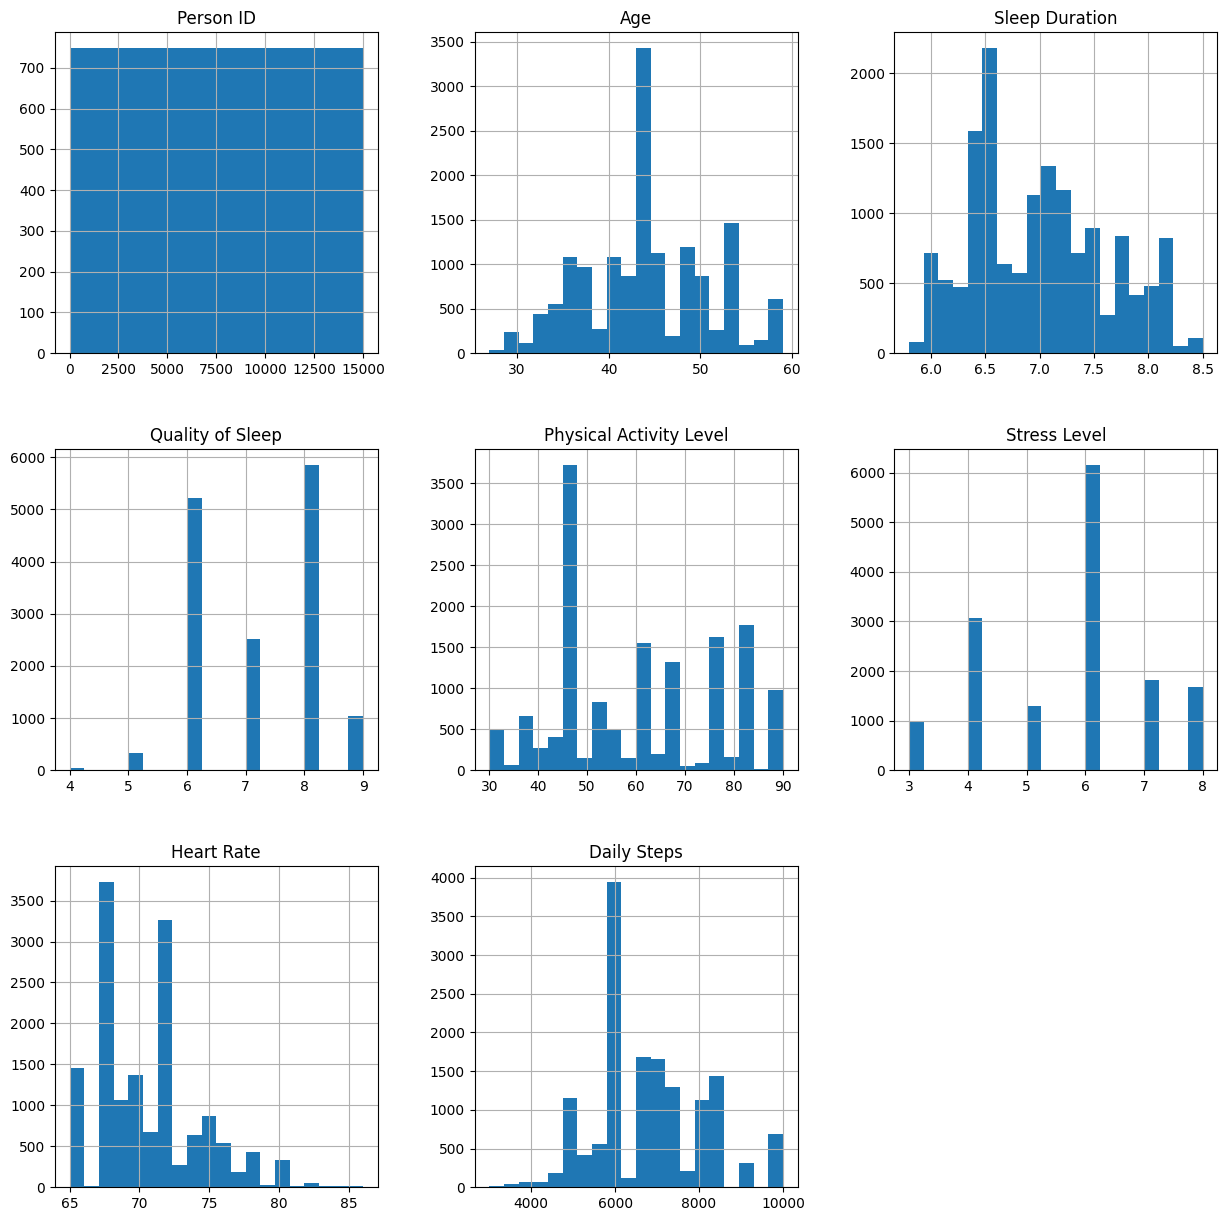

In [74]:
Sleep.hist(bins=20, figsize=(15, 15))

In [75]:
#Reviewing Categorical Variables

categorical_summary = Sleep.describe(include=['object'])

print("Categorical Variables Summary:")
print(categorical_summary)

print("\nDistribution of Categorical Columns:")
for column in Sleep.select_dtypes(include=['object']).columns:
    print(f"\n{column} Distribution:")
    print(Sleep[column].value_counts())

Categorical Variables Summary:
        Gender Occupation BMI Category Blood Pressure Sleep Disorder
count    15000      15000        15000          15000          15000
unique       2         11            4             25              3
top     Female      Nurse   Overweight         130/85        Healthy
freq      8569       4316         8755           4194           5000

Distribution of Categorical Columns:

Gender Distribution:
Gender
Female    8569
Male      6431
Name: count, dtype: int64

Occupation Distribution:
Occupation
Nurse                   4316
Teacher                 2199
Salesperson             1974
Doctor                  1856
Engineer                1719
Lawyer                  1340
Accountant              1134
Scientist                193
Software Engineer        132
Sales Representative     115
Manager                   22
Name: count, dtype: int64

BMI Category Distribution:
BMI Category
Overweight       8755
Normal           4962
Obese             659
Normal Weigh

In [76]:
#Missing Values

print(Sleep.isnull().sum().sort_values(ascending=False).to_string())



Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0


In [77]:
#Removing Variables(Person ID and Blood Pressure)



Sleep_Revised = Sleep.drop(['Person ID', 'Blood Pressure'], axis=1)

# Check the shape of the revised DataFrame
Sleep_Revised.shape


(15000, 11)

In [78]:
#Scaling Variables

numeric_columns = Sleep_Revised.select_dtypes(include=['number']).columns

scaler = MinMaxScaler()
X_scaled = Sleep_Revised.copy()
X_scaled[numeric_columns] = scaler.fit_transform(Sleep_Revised[numeric_columns])

print(X_scaled.describe())



                Age  Sleep Duration  Quality of Sleep  \
count  15000.000000    15000.000000      15000.000000   
mean       0.535333        0.443454          0.626253   
std        0.213753        0.227847          0.210622   
min        0.000000        0.000000          0.000000   
25%        0.406250        0.259259          0.400000   
50%        0.531250        0.444444          0.600000   
75%        0.656250        0.611111          0.800000   
max        1.000000        1.000000          1.000000   

       Physical Activity Level  Stress Level    Heart Rate   Daily Steps  
count              15000.00000  15000.000000  15000.000000  15000.000000  
mean                   0.49875      0.530960      0.278930      0.542154  
std                    0.28024      0.278714      0.172135      0.189958  
min                    0.00000      0.000000      0.000000      0.000000  
25%                    0.25000      0.200000      0.142857      0.428571  
50%                    0.50000      

In [79]:
#One Hot Encoding.

categorical_columns = X_scaled.select_dtypes(include=['object', 'bool']).columns

categorical_columns = [col for col in categorical_columns if col != 'Sleep Disorder']

X_encoded = pd.get_dummies(X_scaled, columns=categorical_columns, drop_first=True)

X_encoded = X_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

X_encoded = X_encoded.apply(pd.to_numeric, errors='ignore')

print(X_encoded.head())


<ipython-input-79-a26c91a6ac9f>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_encoded = X_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


       Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0  0.25000        0.314815               0.6                 0.333333   
1  0.46875        0.407407               0.8                 0.366667   
2  0.21875        0.425926               0.6                 0.600000   
3  0.15625        0.407407               0.4                 0.366667   
4  0.31250        0.388889               0.6                 0.500000   

   Stress Level  Heart Rate  Daily Steps Sleep Disorder  Gender_Male  \
0           0.8    0.285714     0.585714        Healthy            1   
1           0.2    0.047619     0.571429        Healthy            1   
2           0.6    0.428571     0.442857        Healthy            1   
3           0.8    0.285714     0.500000        Healthy            1   
4           0.6    0.285714     0.500000        Healthy            1   

   Occupation_Doctor  ...  Occupation_Manager  Occupation_Nurse  \
0                  1  ...                   0                

<ipython-input-79-a26c91a6ac9f>:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  X_encoded = X_encoded.apply(pd.to_numeric, errors='ignore')


In [80]:
print(X_encoded['Sleep Disorder'].value_counts())


Sleep Disorder
Healthy        5000
Sleep Apnea    5000
Insomnia       5000
Name: count, dtype: int64


In [81]:
X_encoded1 = X_encoded.copy()

In [82]:
X_encoded1['SleepDisorderNumeric'] = X_encoded1['Sleep Disorder'].replace({
    'Healthy': 0,
    'Sleep Apnea': 1,
    'Insomnia': 2
})

X_encoded1 = X_encoded1.drop('Sleep Disorder', axis=1)

print(X_encoded1.head())


       Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0  0.25000        0.314815               0.6                 0.333333   
1  0.46875        0.407407               0.8                 0.366667   
2  0.21875        0.425926               0.6                 0.600000   
3  0.15625        0.407407               0.4                 0.366667   
4  0.31250        0.388889               0.6                 0.500000   

   Stress Level  Heart Rate  Daily Steps  Gender_Male  Occupation_Doctor  \
0           0.8    0.285714     0.585714            1                  1   
1           0.2    0.047619     0.571429            1                  0   
2           0.6    0.428571     0.442857            1                  0   
3           0.8    0.285714     0.500000            1                  1   
4           0.6    0.285714     0.500000            1                  0   

   Occupation_Engineer  ...  Occupation_Nurse  \
0                    0  ...                 0   
1     

<ipython-input-82-6c8038d39604>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_encoded1['SleepDisorderNumeric'] = X_encoded1['Sleep Disorder'].replace({


                                      Age  Sleep Duration  Quality of Sleep  \
Age                              1.000000        0.242359          0.382186   
Sleep Duration                   0.242359        1.000000          0.871070   
Quality of Sleep                 0.382186        0.871070          1.000000   
Physical Activity Level          0.405467        0.258421          0.381601   
Stress Level                    -0.236076       -0.819078         -0.785485   
Heart Rate                      -0.031232       -0.411150         -0.451876   
Daily Steps                      0.258497       -0.003157          0.188875   
Gender_Male                     -0.484160       -0.065060         -0.199704   
Occupation_Doctor               -0.369785        0.072377         -0.002428   
Occupation_Engineer             -0.042979        0.328544          0.226237   
Occupation_Lawyer               -0.183270        0.168293          0.162493   
Occupation_Manager              -0.008118        0.0

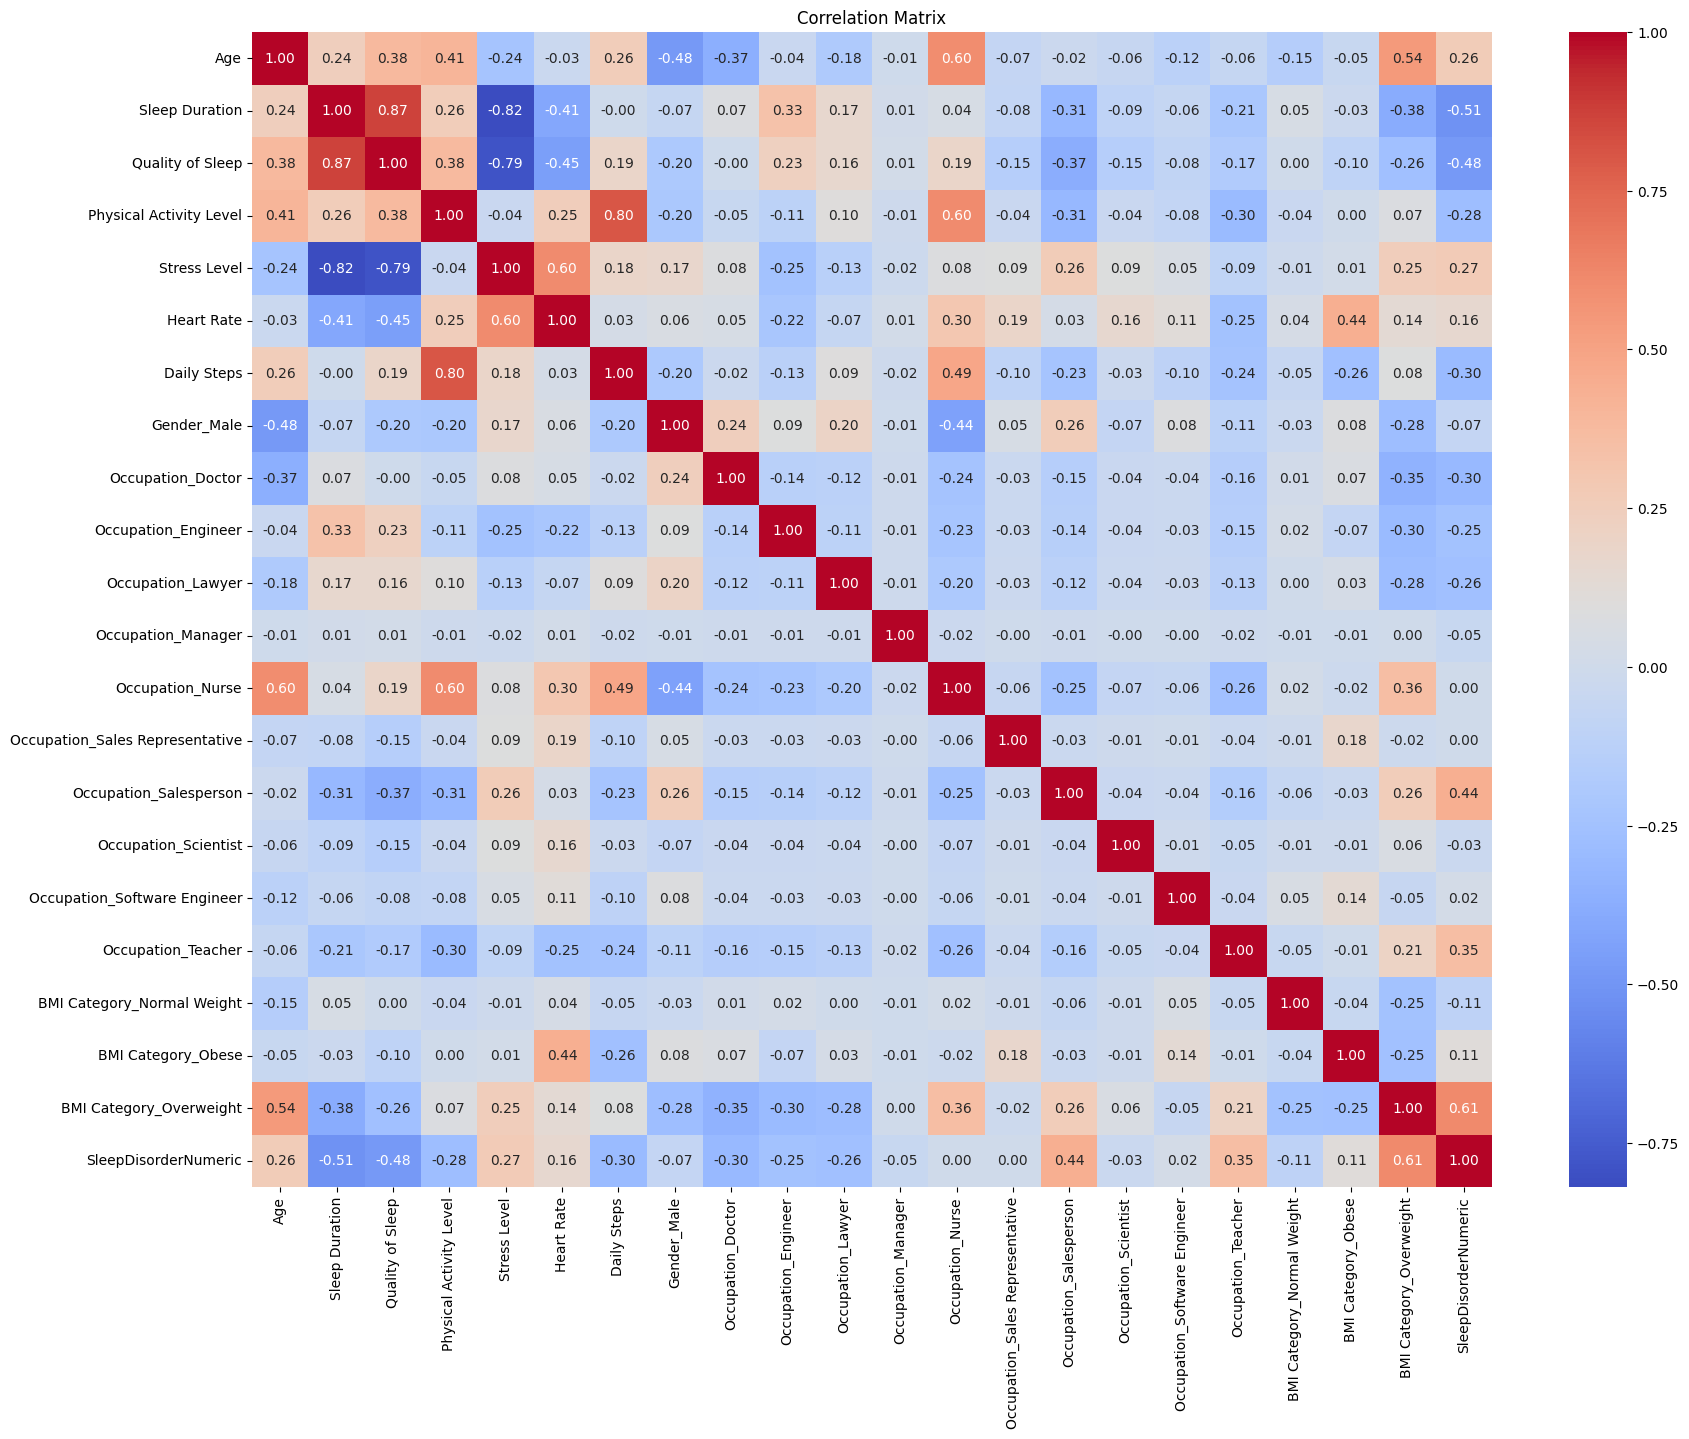

In [61]:
corr_matrix = X_encoded.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [84]:
columns_to_keep = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Occupation_Salesperson',
                   'BMI Category_Overweight', 'Stress Level', 'Occupation_Doctor', 'SleepDisorderNumeric']

new_dataset = X_encoded1[columns_to_keep]

print(new_dataset.head())


       Age  Sleep Duration  Quality of Sleep  Occupation_Salesperson  \
0  0.25000        0.314815               0.6                       0   
1  0.46875        0.407407               0.8                       0   
2  0.21875        0.425926               0.6                       0   
3  0.15625        0.407407               0.4                       0   
4  0.31250        0.388889               0.6                       0   

   BMI Category_Overweight  Stress Level  Occupation_Doctor  \
0                        0           0.8                  1   
1                        0           0.2                  0   
2                        1           0.6                  0   
3                        0           0.8                  1   
4                        0           0.6                  0   

   SleepDisorderNumeric  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = new_dataset.drop('SleepDisorderNumeric', axis=1)
y = new_dataset['SleepDisorderNumeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_test)}")

print(f"Classification Report for Test Set:\n{classification_report(y_test, y_pred_test)}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Train Accuracy: 0.8361904761904762
Test Accuracy: 0.8373333333333334
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1514
           1       0.81      0.80      0.80      1492
           2       0.84      0.80      0.82      1494

    accuracy                           0.84      4500
   macro avg       0.84      0.84      0.84      4500
weighted avg       0.84      0.84      0.84      4500



In [101]:
#Downloading File as a pickle file
with open('file_model.pkl', 'wb') as file:
    pickle.dump(model, file)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>